# Principal Component Analysis (PCA) on MNIST Data
### **Principal Component Analysis (PCA)** is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components⁵.

### PCA is commonly used for dimensionality reduction in data, noise filtering, and data visualization.

### Now, let's talk about PCA on the MNIST dataset. The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. Each image in the MNIST dataset is a 28x28 grayscale image, represented as a 784-dimensional vector. So, the dataset is 784-dimensional.

### However, not all of these dimensions are equally informative. PCA can be used to find the most informative dimensions. Here's a step-by-step process of how PCA can be applied to the MNIST dataset:

### 1. **Standardize the data**: Since PCA is affected by the scales of the features, we need to standardize the features to have a mean=0 and variance=1 before applying PCA.

### 2. **Compute the covariance matrix**: The covariance matrix captures the correlation between the different dimensions of the data.

### 3. **Compute the eigenvalues and eigenvectors of the covariance matrix**: The eigenvectors represent the directions of the maximum variance in the data, and the eigenvalues represent the magnitude of this variance.

### 4. **Sort the eigenvalues and their corresponding eigenvectors**: We sort them in decreasing order of the eigenvalues. The top `k` eigenvectors will be the `k` principal components of the data.

### 5. **Transform the data**: Finally, we transform the data points to the subspace spanned by the `k` principal components.

### By applying PCA to the MNIST dataset, we can reduce its dimensionality from 784 to a much smaller number, while preserving most of the variance in the data. This can make subsequent analysis or modeling of the data much more manageable and efficient.

# Principal Component Analysis (PCA) on the MNIST dataset.

## Here's a step-by-step explanation of what the code does:

### 1. **Load the data**: The `pd.read_csv` function is used to load the MNIST dataset from a CSV file.

### 2. **Preprocess the data**: The 'label' column, which contains the target variable (i.e., the digit each image represents), is separated from the rest of the dataset. The `drop` function is used to remove the 'label' column from the original DataFrame.

### 3. **Visualize a random digit**: A random index is chosen, and the corresponding row of pixel values is reshaped into a 28x28 grid and displayed as an image.

### 4. **Standardize the data**: The `StandardScaler` from sklearn is used to standardize the features to have mean=0 and variance=1. This is a common preprocessing step before many machine learning algorithms.

### 5. **Compute covariance matrix**: The covariance matrix of the standardized data is computed. This matrix provides a measure of how much each pair of features co-varies.

### 6. **Compute eigenvalues and eigenvectors**: The `eigh` function from the scipy library is used to compute the eigenvalues and eigenvectors of the covariance matrix. These will be used in the PCA.

### 7. **Perform PCA**: The `PCA` class from sklearn is used to perform PCA on the standardized data. The `fit` method computes the principal components.

### 8. **Plot cumulative explained variance**: A plot is created showing the cumulative sum of the explained variance ratio as a function of the number of principal components. This helps to visualize how much of the data's variance is captured by each additional principal component.

### 9. **Choose number of PCs**: The code then determines the number of principal components needed to preserve 95% of the variance in the data.

### 10. **Perform PCA with chosen number of PCs**: PCA is performed again, but this time only the chosen number of principal components are computed.

### 11. **Create DataFrame for PCs**: A new DataFrame is created containing the principal components and the corresponding labels.

### 12. **Plot the first two PCs**: A scatter plot is created showing the first two principal components, with points colored according to their label. This provides a visualization of the data in the reduced-dimensional space.

### By applying PCA to the MNIST dataset, we can reduce its dimensionality from 784 to a much smaller number, while preserving most of the variance in the data. This can make subsequent analysis or modeling of the data much more manageable and efficient

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('C:/Users/prave/OneDrive/Desktop/ML_LAB/Lab (1)/Lab/mnist_train.csv')
print("The shape of data is :", df.shape)
df.head()

The shape of data is : (60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


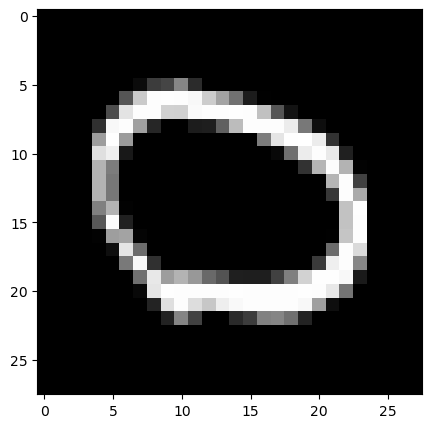

0


In [123]:
label = df['label']
df.drop('label', axis = 1, inplace = True)

# Display a random digit
ind = np.random.randint(0, len(df))
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

In [124]:
# Standardize the data
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape

(60000, 784)

In [125]:
# Compute covariance matrix
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape

(784, 784)

In [126]:
# Compute eigenvalues and eigenvectors
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, subset_by_index = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)

Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


In [127]:
final_df = np.matmul(vectors, std_df.T)
print("vectros:", vectors.shape, "n", "std_df:", std_df.T.shape, "n", "final_df:", final_df.shape)

vectros: (2, 784) n std_df: (784, 60000) n final_df: (2, 60000)


In [128]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

,pca_1,pca_2,label
0,-4.814790,-0.922159,5.0
1,-7.754403,8.708977,0.0
2,9.431338,2.328389,4.0
3,-3.746318,-6.582173,1.0
4,3.133297,-5.183251,9.0
...,...,...,...
59995,-5.119129,-2.039339,8.0
59996,-6.498440,0.607841,3.0
59997,-3.230564,-3.777212,5.0
59998,-4.948125,1.722369,6.0


In [129]:
# Perform PCA
pca = PCA().fit(std_df)

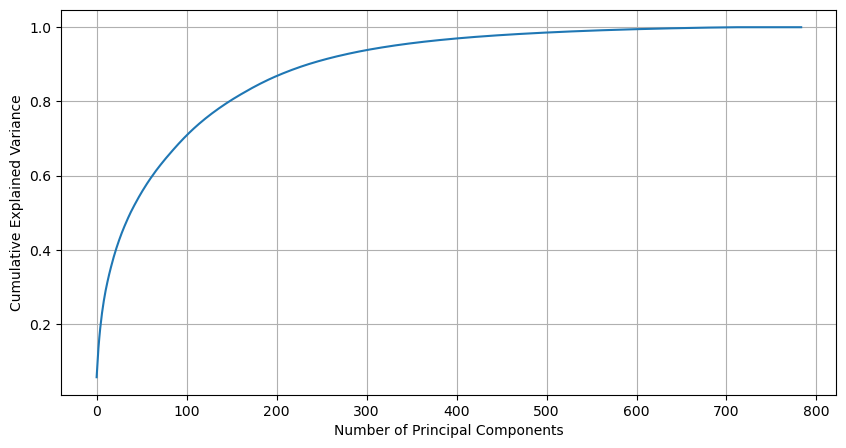

In [130]:
# Plot the cumulative sum of explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [131]:
# Choose the number of PCs that preserve 95% of the variance
n_pcs = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1
print(f"The number of PCs that preserve 95% variance: {n_pcs}")

The number of PCs that preserve 95% variance: 331


In [132]:
# Perform PCA with the chosen number of PCs
pca = PCA(n_components=n_pcs)
pca_df = pca.fit_transform(std_df)

# Print information about the new MNIST data
print("The shape of the new MNIST data after PCA is :", pca_df.shape)

The shape of the new MNIST data after PCA is : (60000, 331)


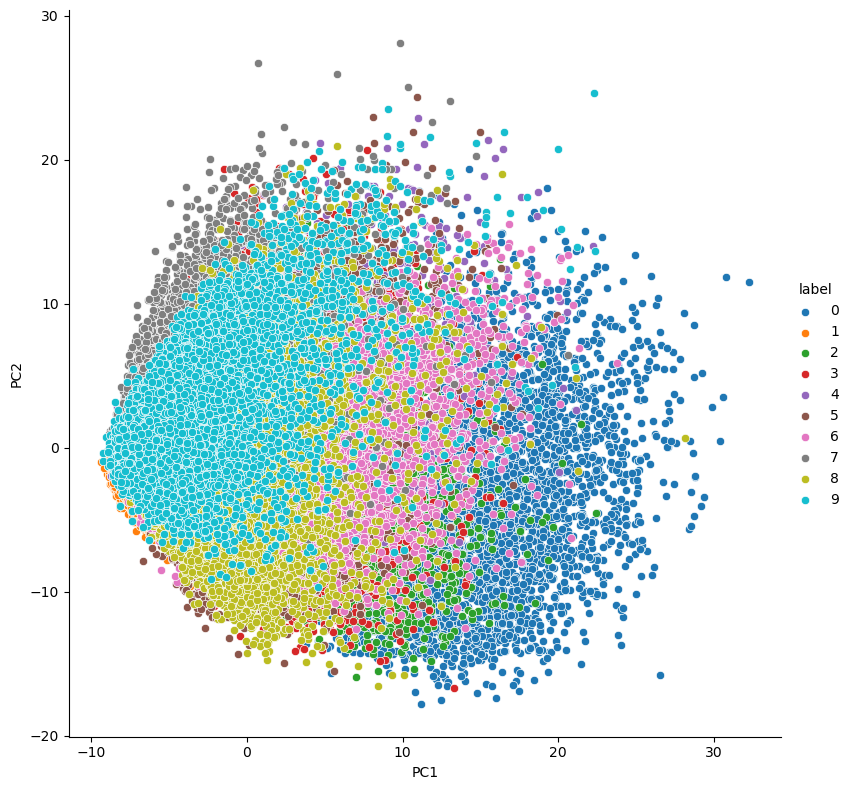

In [133]:
# Create a DataFrame for the PCs
pca_df = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(n_pcs)])
pca_df['label'] = label

# Plot the first two PCs
sns.FacetGrid(pca_df, hue='label', height=8).map(sns.scatterplot, 'PC1', 'PC2').add_legend()
plt.show()

# Silhouette analysis using the K-means clustering algorithm.

## K-means is a centroid-based or partitioning method. It partitions the input data into K distinct clusters based on distance to the centroid of that particular cluster formed. The algorithm iteratively assigns each data point to one of the K groups based on the features that are provided. K-means assumes that clusters are convex and isotropic, which implies that they have a spherical shape. It does this by minimizing intra-cluster variances (i.e., squared Euclidean distances).

### Here's a brief explanation of what the code does:

#### 1. It generates a synthetic dataset with 500 samples, 2 features, and 4 centers using the `make_blobs` function.
#### 2. It initializes a list to store the average silhouette scores for different numbers of clusters.
#### 3. It then loops over a range of desired cluster numbers (from 2 to 6 in this case).
#### 4. For each number of clusters, it performs K-means clustering and computes the silhouette score for each sample using the `silhouette_samples` function. The average of these scores is also computed using the `silhouette_score` function.
#### 5. It creates a silhouette plot for each number of clusters. This plot includes a silhouette coefficient for each sample in every cluster, which is a measure of how similar that sample is to the samples in its own cluster compared to samples in other clusters.
#### 6. It also creates a scatter plot showing the actual clusters formed by the K-means algorithm.
#### 7. Finally, it displays the plots.

### So, in summary, this code is using the K-means algorithm to perform clustering on a synthetic dataset and then conducting a silhouette analysis to evaluate the quality of the clustering. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with a higher score indicating better clustering. The silhouette plot visually represents this score for each sample. 😊

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


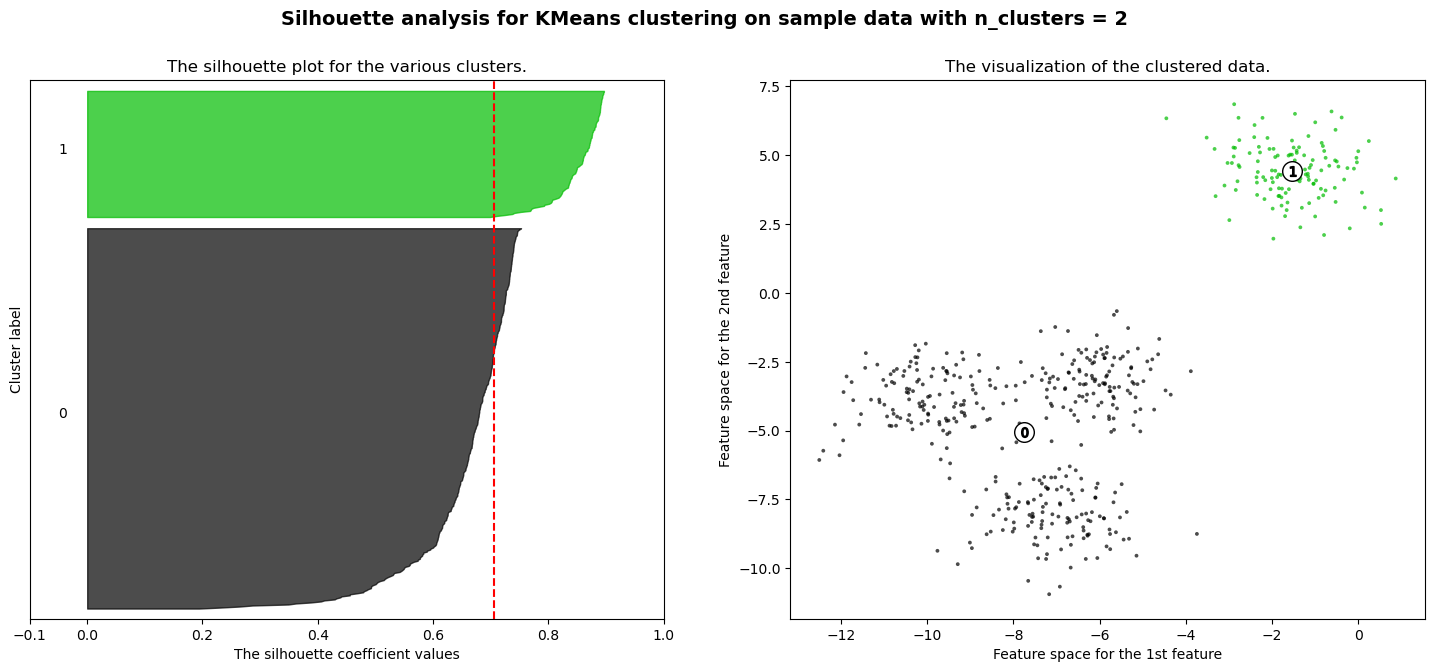

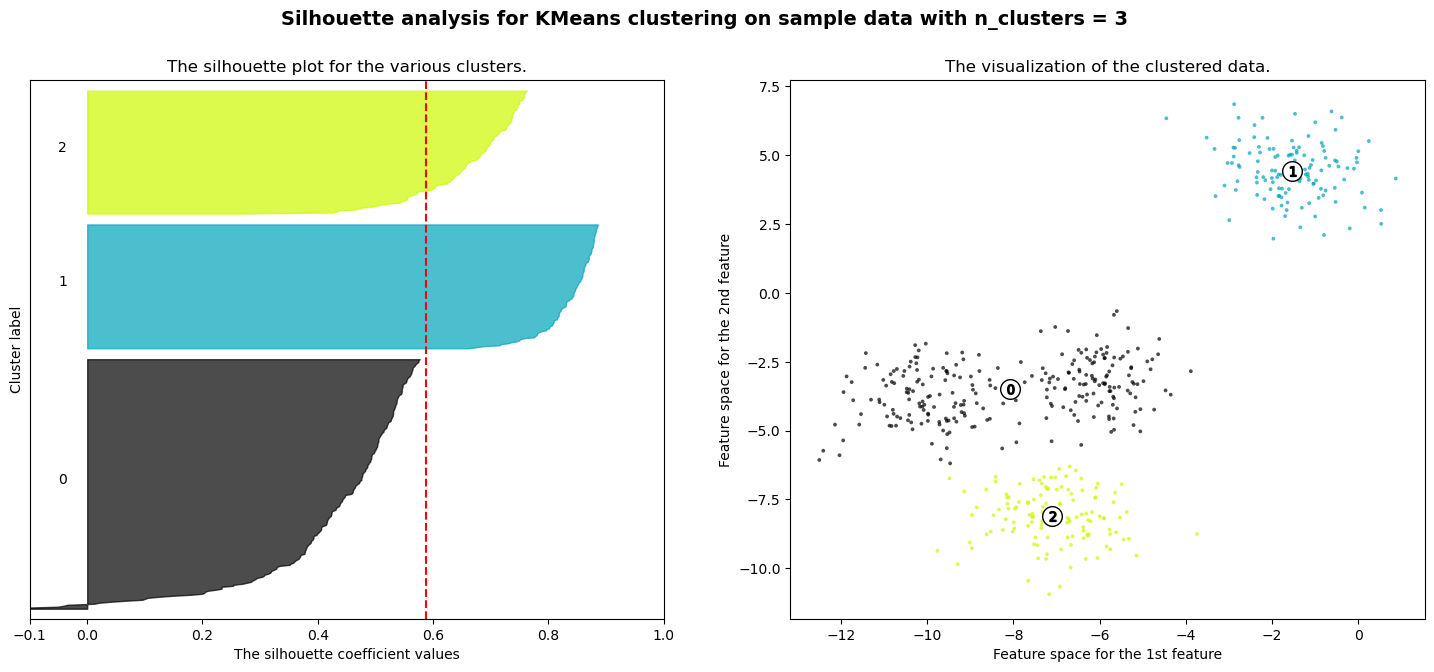

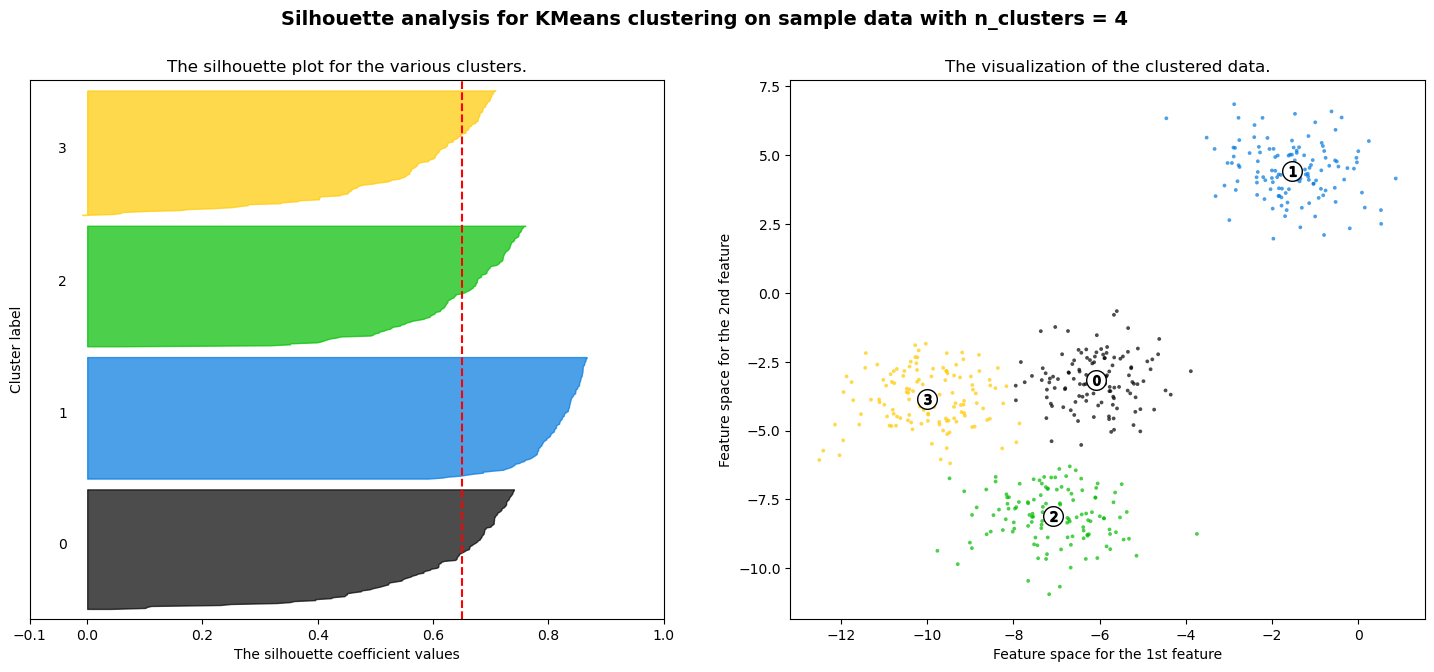

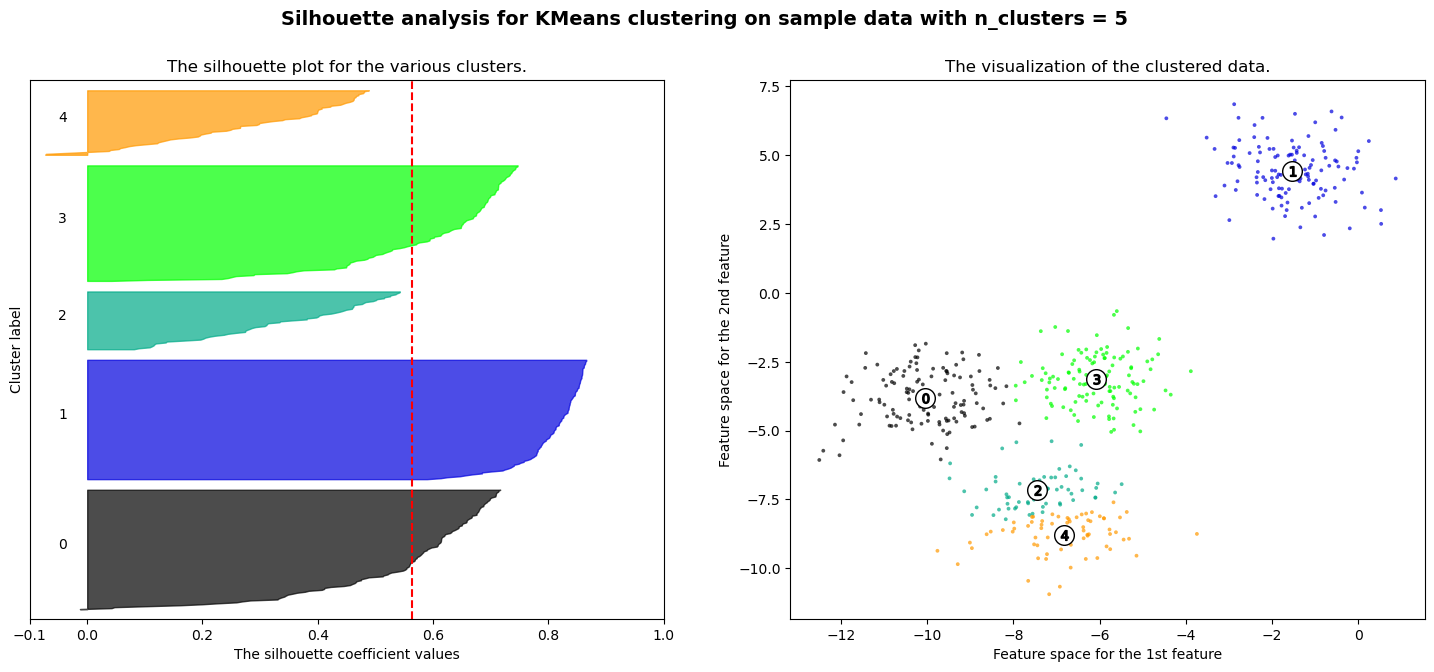

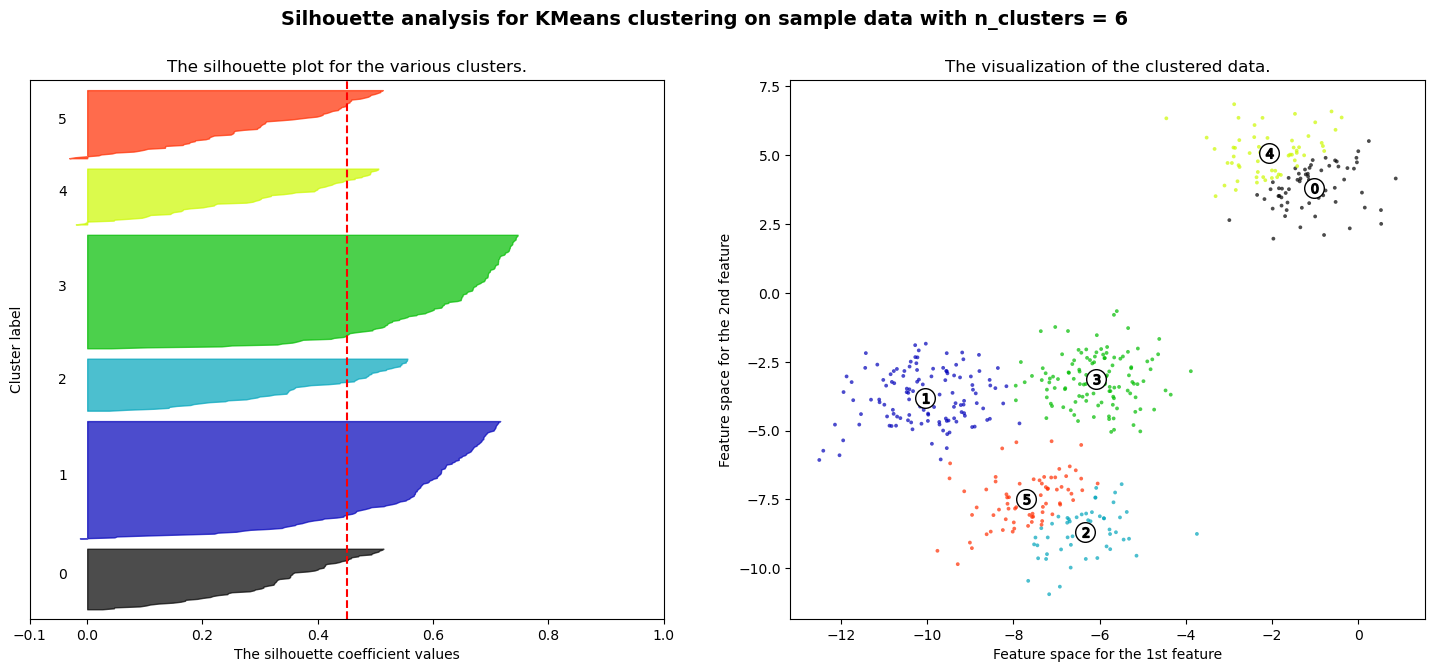

In [134]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Set the environment variable to avoid the UserWarning
os.environ['OMP_NUM_THREADS'] = '2'

# Generate sample data
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avgs = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)  # Set n_init explicitly to avoid the FutureWarning
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

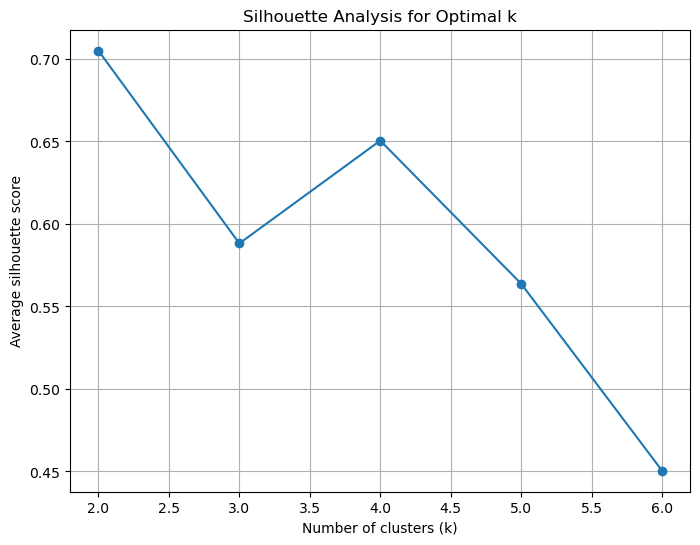

The optimal number of clusters is : 2


In [135]:
# Plot silhouette score vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_k = range_n_clusters[np.argmax(silhouette_avgs)]
print("The optimal number of clusters is :", optimal_k)

# Perform K-means clustering using the optimal k
clusterer_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=10)
cluster_labels_optimal = clusterer_optimal.fit_predict(X)


# Silhouette analysis using the Gaussian Mixture Model (GMM) clustering algorithm. 


## Gaussian Mixture Models (GMM), on the other hand, is a method of ‘soft clustering’. In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. GMM assumes that the data points are Gaussian distributed. This makes it a lot more flexible in terms of cluster covariance compared to K-means; due to this, GMM is able to identify more complex clusters.

### Here’s a brief explanation of what the code does:

#### 1. It generates a synthetic dataset with 500 samples, 2 features, and 4 centers using the make_blobs function.
#### 2. It initializes a list to store the average silhouette scores for different numbers of clusters.
#### 3. It then loops over a range of desired cluster numbers (from 2 to 6 in this case).
#### 4.For each number of clusters, it performs GMM clustering and computes the silhouette score for each sample using the silhouette_samples function. The average of these scores is also computed using the silhouette_score function.
#### 5.It creates a silhouette plot for each number of clusters. This plot includes a silhouette coefficient for each sample in every cluster, which is a measure of how similar that sample is to the samples in its own cluster compared to samples in other clusters.
#### 6. It also creates a scatter plot showing the actual clusters formed by the GMM algorithm.
#### 7. Finally, it displays the plots.
### So, in summary, this code is using the GMM algorithm to perform clustering on a synthetic dataset and then conducting a silhouette analysis to evaluate the quality of the clustering. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with a higher score indicating better clustering. The silhouette plot visually represents this score for each sample. 😊 user what is the difference between k-means and gmm assistant’ K-means and Gaussian Mixture Models (GMM) are both clustering algorithms, but they have different underlying assumptions and methods.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6500220819411945
For n_clusters = 5 The average silhouette_score is : 0.5660887268330578
For n_clusters = 6 The average silhouette_score is : 0.43625989014577177


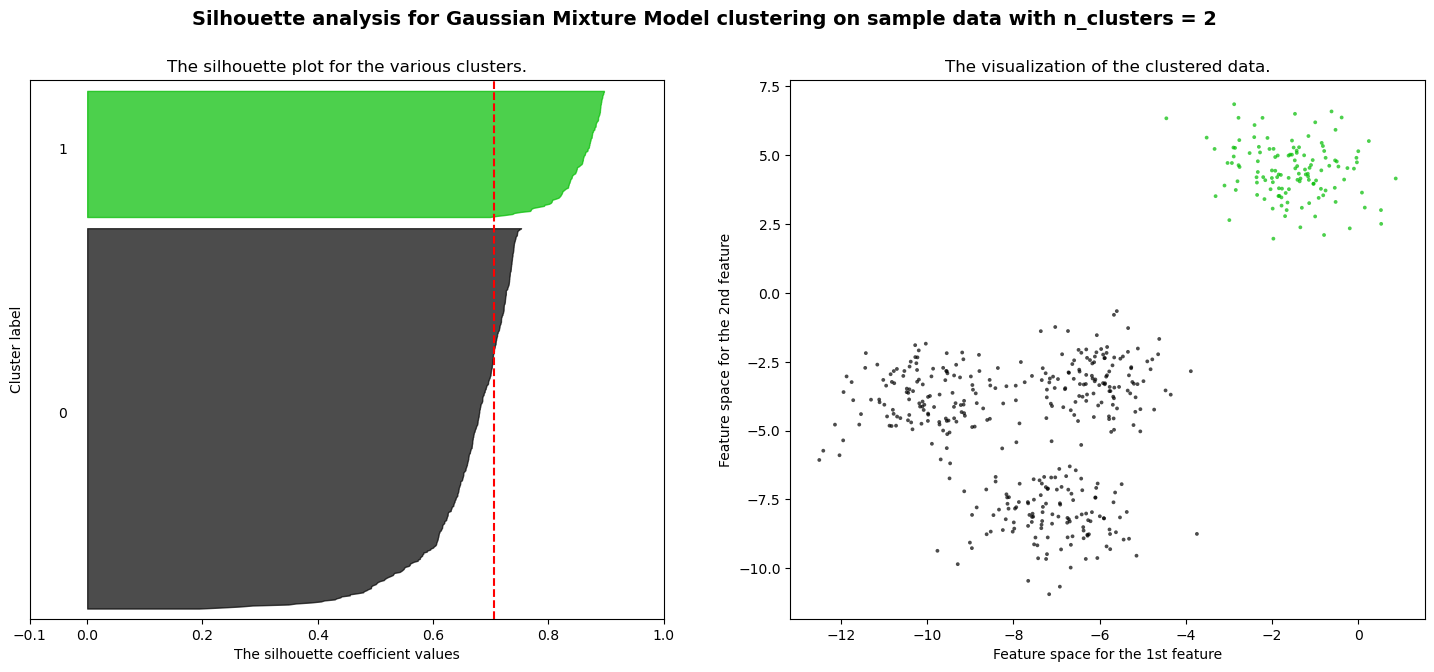

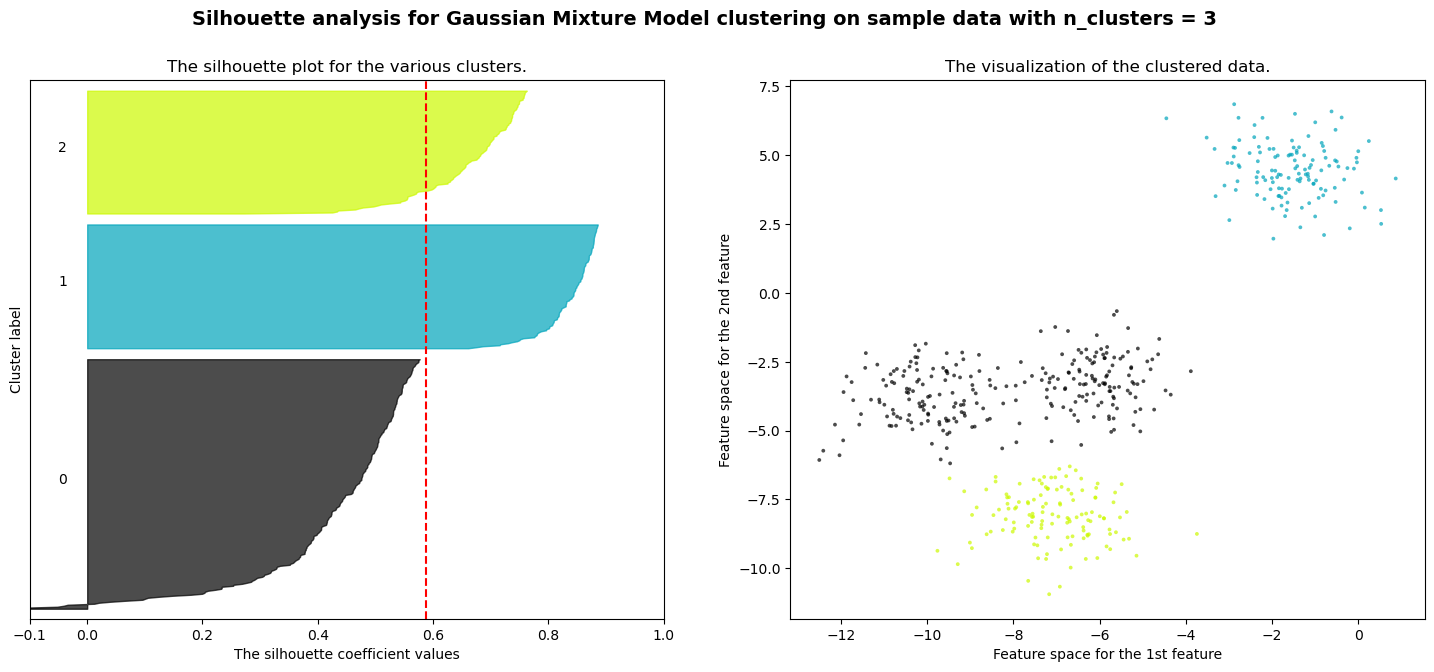

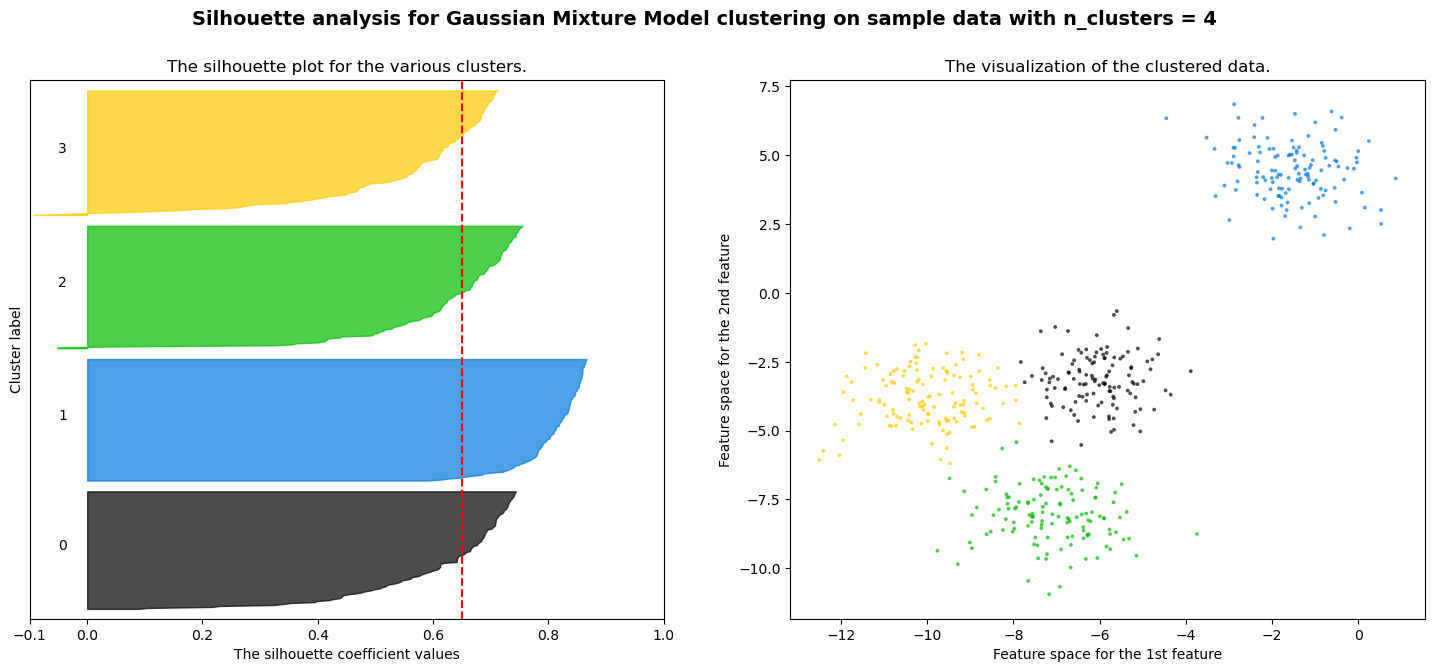

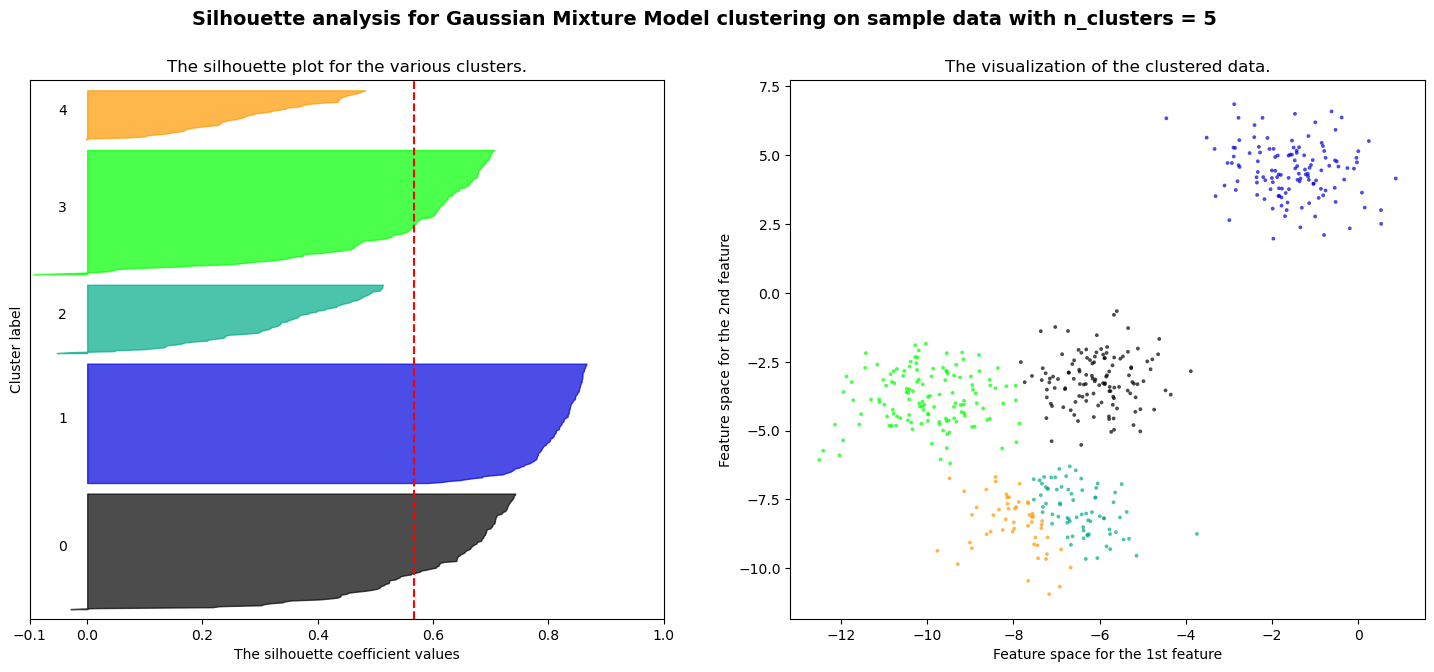

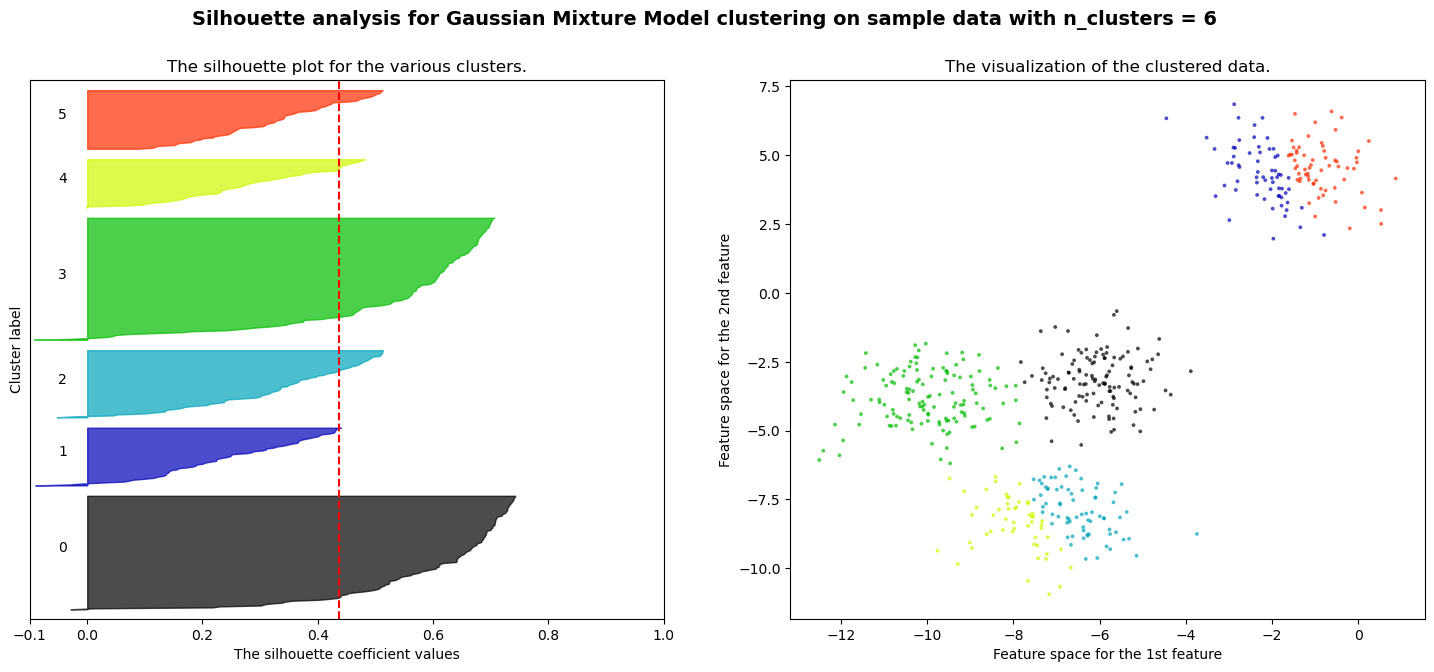

In [136]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

# Set the environment variable to avoid the UserWarning
os.environ['OMP_NUM_THREADS'] = '2'

# Generate sample data
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avgs = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = gmm.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Gaussian Mixture Model clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

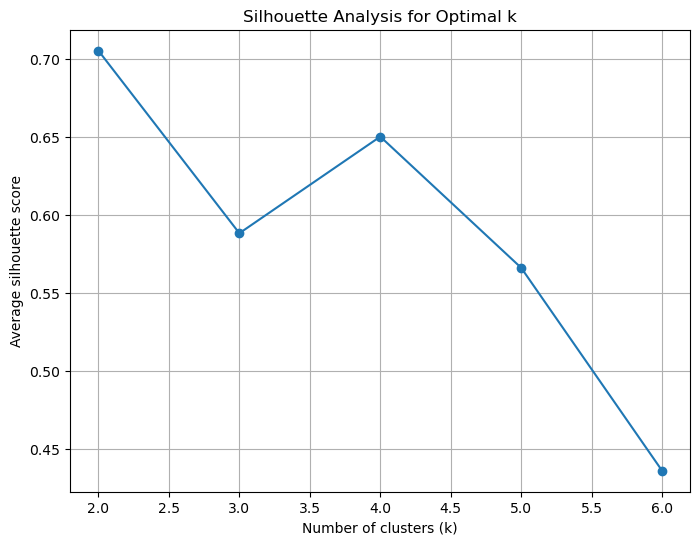

The optimal number of clusters is : 2


In [137]:
# Plot silhouette score vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_k = range_n_clusters[np.argmax(silhouette_avgs)]
print("The optimal number of clusters is :", optimal_k)